In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA



In [15]:
pip install -U scikit-learn

In [7]:
df= pd.read_csv('/Transactions.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [9]:
print(df.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
df1= pd.read_csv('/Customers.csv')

In [11]:
print(df1.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [12]:
df2= pd.read_csv('/Products.csv')

In [13]:
print(df2.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
df.describe().round(2)

,Quantity,TotalValue,Price
count,1000.00,1000.00,1000.00
mean,2.54,690.00,272.55
std,1.12,493.14,140.74
min,1.00,16.08,16.08
25%,2.00,295.29,147.95
50%,3.00,588.88,299.93
75%,4.00,1011.66,404.40
max,4.00,1991.04,497.76


In [20]:
df2.describe().round(2)

,Price
count,100.00
mean,267.55
std,143.22
min,16.08
25%,147.77
50%,292.88
75%,397.09
max,497.76


In [27]:
customers = pd.read_csv("/Customers.csv")
products = pd.read_csv("/Products.csv")
transactions = pd.read_csv("/Transactions.csv")

In [29]:
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"], format="%Y-%m-%d")
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"], format="%Y-%m-%d %H:%M:%S")

In [30]:
today = pd.Timestamp.now()
customers["Tenure"] = (today - customers["SignupDate"]).dt.days

In [31]:
transactions = transactions.merge(products, on="ProductID", how="left")

In [32]:
customer_transactions = transactions.groupby("CustomerID").agg(
    TotalTransactionValue=("TotalValue", "sum"),
    TotalTransactions=("TransactionID", "count"),
    AvgTransactionValue=("TotalValue", "mean"),
    UniqueProducts=("ProductID", "nunique"),
    MostFrequentCategory=("Category", lambda x: x.mode()[0] if not x.mode().empty else np.nan)
).reset_index()

In [33]:
customer_data = customers.merge(customer_transactions, on="CustomerID", how="left")

In [34]:
customer_data.fillna({
    "TotalTransactionValue": 0,
    "TotalTransactions": 0,
    "AvgTransactionValue": 0,
    "UniqueProducts": 0,
    "MostFrequentCategory": "None"
}, inplace=True)

In [35]:
def generate_insights(df):
    print("1. Total Customers:", len(df))
    print("2. Total Transactions:", df["TotalTransactions"].sum())
    print("3. Average Transaction Value:", df["AvgTransactionValue"].mean())
    print("4. Top Region by Transactions:", df.groupby("Region")["TotalTransactions"].sum().idxmax())
    print("5. Most Popular Product Category:", df["MostFrequentCategory"].value_counts().idxmax())

In [36]:
generate_insights(customer_data)

1. Total Customers: 200
2. Total Transactions: 1000.0
3. Average Transaction Value: 684.142281213925
4. Top Region by Transactions: South America
5. Most Popular Product Category: Books


In [48]:

merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

<ipython-input-49-3fcd03d3d21a>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  customers.set_index('SignupDate').resample('M').size().plot()


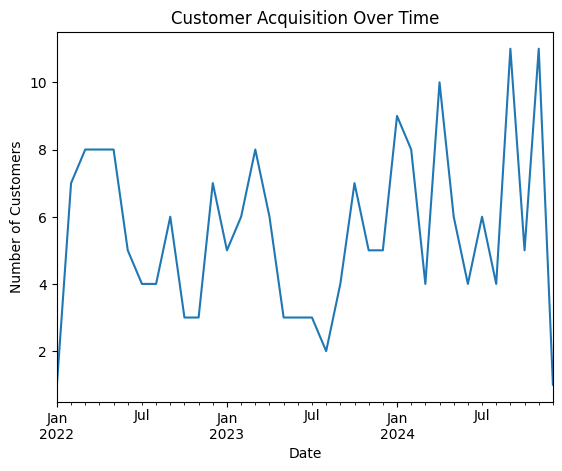

In [49]:


# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Plot customer acquisition over time
customers.set_index('SignupDate').resample('M').size().plot()
plt.title('Customer Acquisition Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.show()

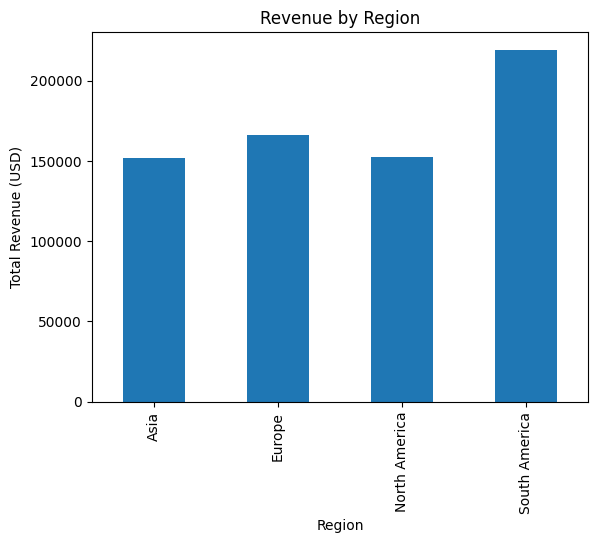

In [50]:
# Calculate total revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()

# Plot revenue by region
revenue_by_region.plot(kind='bar')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [52]:
print(merged_data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'ProductName_x', 'Category_x',
       'Price_y', 'CustomerName', 'Region', 'SignupDate', 'Tenure',
       'ProductName_y', 'Category_y', 'Price'],
      dtype='object')


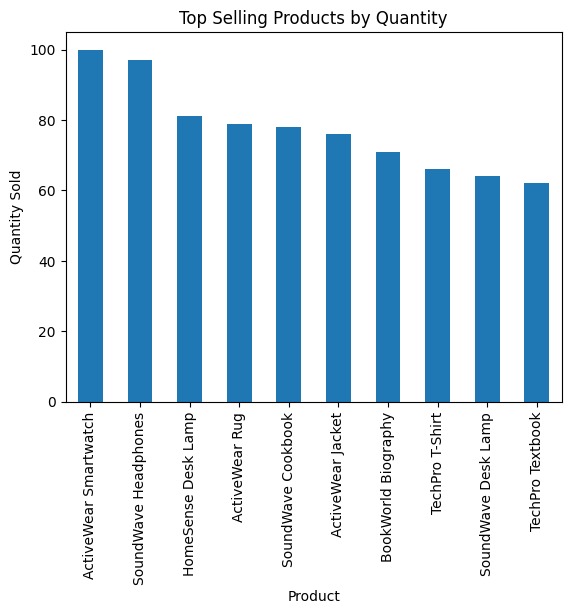

In [53]:
# Group by ProductName_y (from products DataFrame) and sum the Quantity
top_products = merged_data.groupby('ProductName_y')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
top_products.plot(kind='bar')
plt.title('Top Selling Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

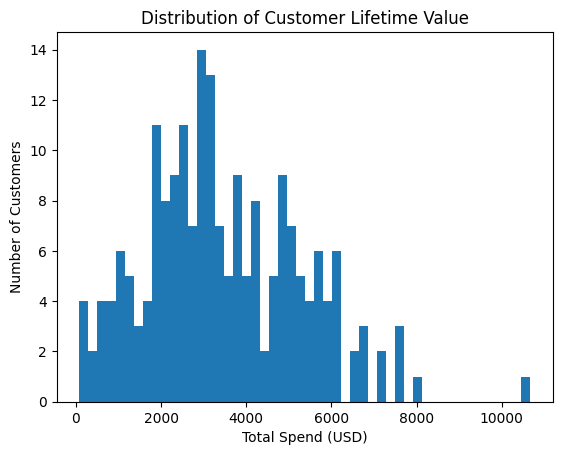

In [54]:
# Calculate total spend per customer
customer_spend = merged_data.groupby('CustomerID')['TotalValue'].sum()

# Plot the distribution of customer spend
customer_spend.plot(kind='hist', bins=50)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Number of Customers')
plt.show()

In [60]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().reset_index()

In [61]:
customer_revenue = customer_revenue.sort_values(by='TotalValue', ascending=False)

In [62]:
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalValue'].cumsum()
total_revenue = customer_revenue['TotalValue'].sum()
customer_revenue['CumulativePercentage'] = (customer_revenue['CumulativeRevenue'] / total_revenue) * 100

In [64]:
threshold = customer_revenue[customer_revenue['CumulativePercentage'] <= 80]

In [65]:
percent_customers = (len(threshold) / len(customer_revenue)) * 100
print(f"{percent_customers:.2f}% of customers contribute to 80% of the revenue.")

60.30% of customers contribute to 80% of the revenue.


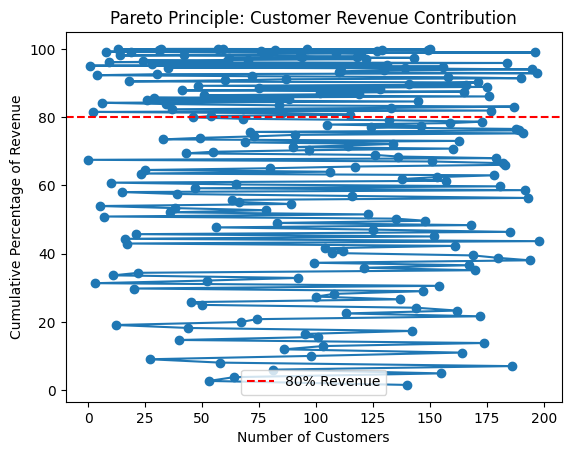

In [66]:
plt.plot(customer_revenue['CumulativePercentage'], marker='o')
plt.axhline(80, color='r', linestyle='--', label='80% Revenue')
plt.title('Pareto Principle: Customer Revenue Contribution')
plt.xlabel('Number of Customers')
plt.ylabel('Cumulative Percentage of Revenue')
plt.legend()
plt.show()

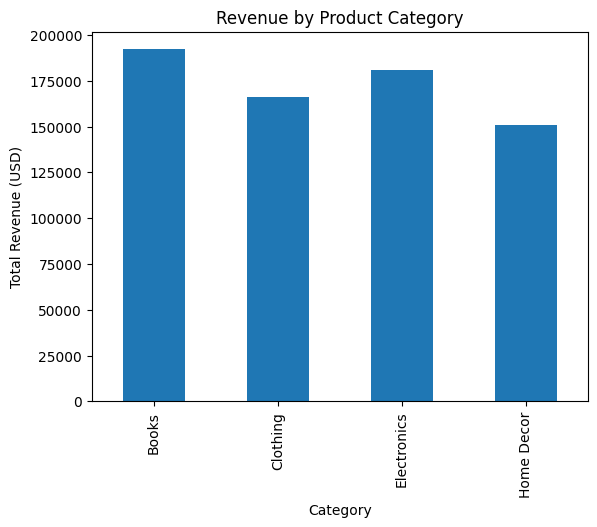

In [56]:
# Calculate total revenue by product category
revenue_by_category = merged_data.groupby('Category_x')['TotalValue'].sum()

# Plot revenue by category
revenue_by_category.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()

In [57]:
# Example: Create a feature for the number of days since the customer signed up
merged_data['DaysSinceSignup'] = (pd.to_datetime(merged_data['TransactionDate']) - pd.to_datetime(merged_data['SignupDate'])).dt.days

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [59]:
# Define features and target
X = merged_data[['DaysSinceSignup', 'Quantity', 'Price']]
y = merged_data['TotalValue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 53.23955206705075
